<a href="https://colab.research.google.com/github/EldritchBear/ADA-Informes/blob/main/CutRod.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Descripción del problema

La programación dinámica es un metodo similar al ya visto metodo de "divide y vencerás", ambos dividen el problema original en subproblemas y con las soluciones de estos subproblemas, si se combinan, se consigue la respuesta al problema original. 

Para poder aplicar la programación dinámica los subproblemas deben compartir soluciones, esto es debido a que si un subproblema ya fue resuelto con anterioridad solamente se debe buscar el valor que resulto al resolverlo por primera vez, esto se hace para no tener que resolver los mismos subproblemas más de una sola vez.

La programación dinámica puede ser útil en algoritmos de optimización, como es en este caso con el algoritmo del $cutting Rod$, donde se ingresará un arreglo de precios dependiendo de la longitud y donde se debe retornar el mayor beneficio que se puede conseguir de una varilla.

Entrada: arreglo $p$ de tamaño $n$ que es el arreglo con los precios dependiendo de la longitud de la varilla

Salida: valor máximo del beneficio que se puede sacar de la varilla cortada.


#2. Descripción del algoritmo

El algoritmo del $Cutting Rod$ es un algoritmo de optimización, en el que se busca sacar el mayor beneficio de una varilla de metal de longitud n, a la cual se le van realizando cortes, con cada longitud teniendo un precio. Este algoritmo va diviendo el arreglo inicial, creando subproblemas hasta llegar a un caso base, y desde ese momento se empieza a calcular el retorno máximo.

Pasos que realiza el algoritmo:

1) el algoritmo divide el arreglo en todos los cortes posibles

2) se calcula el retorno máximo de cada corte y se comparan con los demás hasta encontrar el máximo

Se puede encontrar que este algoritmo presenta una subestructura óptima debido a que:

1) está constantemente realizando elecciones al estar generando subproblemas con cada corte que se produce.

2) se revisa cada corte para ver si la solucion que entrega es la óptima.

3) con las soluciones de los subproblemas (cortes) se entrega el valor máximo de los cortes, utilizando soluciones óptimas de los subproblemas para conseguir la solución óptima del problema.

La función de recursividad de del algoritmo "Cutting Rod" es:

 max(valMax, p[i]+ cutRodRecursivo(p,n-i-1) 

 Aqui se busca el valor máximo entre el valor máximo guardado con anterioridad con el valor de un corte menor. De esta forma se esta recursivamente reduciendo el tamaño de la varilla y calculando el valor máximo del corte.





#2.1 Implementación para crear arreglos de precios
Se utilizará más adelante con las implementaciones del algoritmo "Cutting rod"

In [1]:
import random

def cutrod_instance_generator(N):
  A = []
  prev = 0
  for i in range(N):
    r=random.randint(0,10)
    A.append(prev+r)
    prev+=r
  return A

#2.2 Cutting Rod implementado de forma recursiva
Se utilizan arreglos de precios de tamaño 4 debido a la cantidad de llamadas que el algoritmo realiza, por lo que el verbose con un arreglo de tamaño 10, que es el que se utilizará luego con programación dinámica quedaría muy extenso.

In [ ]:
llamadasRecursivas = 0                                                          #variables para almacenar la cantidad de llamadas y los cortes
indice = 0
def cutRodRecursivo(p,n,verbose):
  global llamadasRecursivas
  global indice
  if n == 0:                                                                    #en caso de que se llegue al caso base
    return 0

  aux = float("-inf")                                                           #variable en donde se va a almacenar el mayor beneficio

  for i in range(0,n):                                                          #se comienza a recorrer el arreglo (o varilla) buscando los valores máximos llamando
    aux2 = aux                                                                  #recursivamente a la función para ir realizando los cortes.
    aux = max(aux, p[i]+ cutRodRecursivo(p,n-i-1,verbose))                      #se utiliza el valor aux y aux2 para encontrar el nuevo valor máximo y mover el indice
    if aux > aux2:                                                             #a la posición correspondiente para luego mostrar el corte
      indice = i
    llamadasRecursivas += 1
    if verbose:
      print(f"valor máximo encontrado hasta el momento es {aux} con una varilla de largo {i+1}\n")
  return aux

In [ ]:
a = cutrod_instance_generator(4)
print(f"Arreglo de precios: {a}")
n = len(a)
verbose = False

q = cutRodRecursivo(a,n,verbose)
print(f"valor máximo es {q}, encontrado en {llamadasRecursivas} llamadas, con los cortes {a[:indice]} y {a[indice:]}")
llamadasRecursivas = 0

Arreglo de precios: [8, 9, 11, 18]
valor máximo es 32, encontrado en 15 llamadas, con los cortes [] y [8, 9, 11, 18]


In [ ]:
a = cutrod_instance_generator(4)
print(f"Arreglo de precios: {a}")
n = len(a)
verbose = True

q = cutRodRecursivo(a,n,verbose)
print(f"valor máximo es {q}, encontrado en {llamadasRecursivas} llamadas, con los cortes {a[:indice]} y {a[indice:]}")
llamadasRecursivas = 0

Arreglo de precios: [6, 12, 18, 26]
valor máximo encontrado hasta el momento es 6 con una varilla de largo 1

valor máximo encontrado hasta el momento es 12 con una varilla de largo 1

valor máximo encontrado hasta el momento es 12 con una varilla de largo 2

valor máximo encontrado hasta el momento es 18 con una varilla de largo 1

valor máximo encontrado hasta el momento es 6 con una varilla de largo 1

valor máximo encontrado hasta el momento es 18 con una varilla de largo 2

valor máximo encontrado hasta el momento es 18 con una varilla de largo 3

valor máximo encontrado hasta el momento es 24 con una varilla de largo 1

valor máximo encontrado hasta el momento es 6 con una varilla de largo 1

valor máximo encontrado hasta el momento es 12 con una varilla de largo 1

valor máximo encontrado hasta el momento es 12 con una varilla de largo 2

valor máximo encontrado hasta el momento es 24 con una varilla de largo 2

valor máximo encontrado hasta el momento es 6 con una varilla de la

#2.3 Cutting Rod implementado con programación dinámica

In [6]:
cantidadSubproblemas = 0
def cutRodBottomUp(p,n,verbose):
  memoria = [0] * n                                                             #arreglo donde se van a almacenar los valores calculados con anterioridad
  global cantidadSubproblemas                                                   #contador de subproblemas y variable con el indice de los cortes
  global indice

  if n == 0:                                                                    #verificación si se encuentra en el caso base.
    if verbose:
      print("varilla de tamaño 0, retornando")
    return 0

  if verbose:                                 
    print(f"arreglo entrante de precios: {p}")

  for j in range(0,n):                                                          #se recorre el arreglo anidando dos ciclos for, uno llevando la longitud total del arreglo
    if verbose:                                                                 #mientras que el otro recorre todos los posibles cortes con esa longitud.
      print(f"analizando varilla de largo {j+1}")
    aux = float("-inf")
    aux2 = 0
    for i in (1,j):                                                      #en este for se comienza a analizar los subproblemas buscando la solución optima de cada uno
      cantidadSubproblemas += 1                                                 #y con ayuda de un segundo auxiliar se compara si hubo un cambio en el valor
      aux2 = aux                                                                #para mover el índice de cortes.
      aux = max(aux, p[i] + memoria[j-i-1])
      if aux > aux2:
        indice = j
      if verbose:
        print(f"valor máximo encontrado entre {aux} y {p[i] + memoria[j-i-1]} es: {aux}\n")
    memoria[j] = aux
  return aux

In [9]:
a = cutrod_instance_generator(10)
n = len(a)
verbose = False

q = cutRodBottomUp(a,n,verbose)
print(f"valor máximo es {q}, encontrado en {cantidadSubproblemas} llamadas, con los cortes {a[:indice]} y {a[indice:]}")
cantidadSubproblemas = 0

valor máximo es 48, encontrado en 20 llamadas, con los cortes [6, 8, 18, 23, 26, 32, 33, 35, 39] y [43]


In [ ]:
a = cutrod_instance_generator(10)
n = len(a)
verbose = True

q = cutRodBottomUp(a,n,verbose)
print(f"valor máximo es {q}, encontrado en {cantidadSubproblemas} llamadas, con los cortes {a[:indice]} y {a[indice:]}")
cantidadSubproblemas = 0

arreglo entrante de precios: [3, 9, 11, 19, 25, 28, 37, 42, 51, 53]
analizando varilla de largo 1
valor máximo encontrado entre 3 y 3 es: 3

analizando varilla de largo 2
valor máximo encontrado entre 6 y 6 es: 6

valor máximo encontrado entre 9 y 9 es: 9

analizando varilla de largo 3
valor máximo encontrado entre 12 y 12 es: 12

valor máximo encontrado entre 12 y 12 es: 12

valor máximo encontrado entre 12 y 11 es: 12

analizando varilla de largo 4
valor máximo encontrado entre 15 y 15 es: 15

valor máximo encontrado entre 18 y 18 es: 18

valor máximo encontrado entre 18 y 14 es: 18

valor máximo encontrado entre 19 y 19 es: 19

analizando varilla de largo 5
valor máximo encontrado entre 22 y 22 es: 22

valor máximo encontrado entre 22 y 21 es: 22

valor máximo encontrado entre 22 y 20 es: 22

valor máximo encontrado entre 22 y 22 es: 22

valor máximo encontrado entre 25 y 25 es: 25

analizando varilla de largo 6
valor máximo encontrado entre 28 y 28 es: 28

valor máximo encontrado e

#3 Tiempo de ejecucción

La siguiente función nos entrega que la cantidad de subproblemas que se deben resolver para una entrada de $n$ datos.

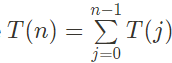

Esta ecuación nos entrega que se necesita resolver $2^n$ subproblemas para una entrada de datos de tamaño $n$.

El tiempo de ejecucción para el algoritmo completo es de $O(n^2)$ debido a la necesidad de tener dos ciclos $for$ anidados para poder utilizar el metodo $bottom-up$ del algoritmo. El tiempo de ejecucción de los subproblemas, al únicamente estarse recorriendo y comparando valores tienen el valor de $O(n)$. Por último, la complejidad espacial del algoritmo es de $O(n)$, debido a que debe almacenar $n$ datos extras que son los valores máximos de cada longitud.

#4 Correctitud

Caso base:
Cuando n = 0, ya se encuentra el valor máximo del beneficio posible, ya que este valor siempre es el mismo (0)

Mantención: Luego de una n-ésima iteración, dentro del segundo for el algoritmo verifica y almacena en caso de que el valor sea mayor al máximo anterior, por lo que luego de la iteración, puede asegurarse que se guarda el máximo precio hasta el momento.



#5. Experimentos

A continuacion se realizara una serie de experimentos para comparar el rendimiento de la implementacion **dinaminca bottom up** y la implementacion **recursiva**.

##5.1. tiempo de ejecucion

En este experimento se comparar el tiempo de ejecucion de la implentacion **bottom up** y la **recursiva**, para esto el algortimo va a crear una lista de precios aleatoria y va ejecutar ambas implementaciones $10$ veces, de entre las cuales va a elegir la mejor y graficarla.

* tiempo de ejecucion de **bottom up** (la gráfica azul)
* Tiempo de ejecucion de **recursiva** (la gráfica naranja)

para un problema que tiene un tamaño $n \in [5,15]$

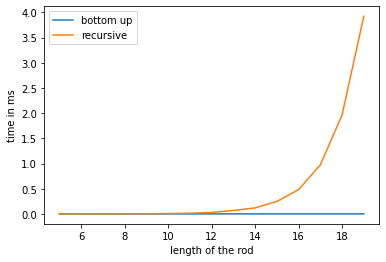

In [ ]:
import matplotlib.pyplot as plt
import datetime
from timeit import repeat
import random

x=[]; y=[]
x1=[]; y1=[]

for n in range(5,20):

  p = cutrod_instance_generator(n)
  a = p
  l = len(p)
  verbose = False

  #la función repeat está ejecutando 20 veces cada algoritmo con el arreglo a y retorna el mejor tiepo obtenido para cada uno.
  t = repeat(setup="from __main__ import cutRodBottomUp", stmt=f"cutRodBottomUp({p},{l},{verbose})", repeat=1, number=10)

  x.append(n)
  y.append(t)
  cont = 0

  t = repeat(setup="from __main__ import cutRodRecursivo", stmt=f"cutRodRecursivo({a},{l},{verbose})", repeat=1, number=10)

  x1.append(n)
  y1.append(t)
  cont = 0

plt.plot(x,y)
plt.plot(x1,y1)
plt.legend(["bottom up", "recursive"])

plt.xlabel('length of the rod')
plt.ylabel('time in ms')
plt.show()

El gráfico anterior demuestra cómo la programación dinámica muy eficiente en cuanto se refiere al tiempo, lo contrario ocurre con el caso recursivo, donde para tan solo una varilla de largo 20 ya se demora alrededor de 4 segundos, y si amentamos el largo a tan solo 21 se llega a demorar 8. Si repetimos lo mismo y aumentamos el largo a 22, el tiempo sube a 16 segundos, lo que comienza a mostrar un crecimiento exponencial, lo mismo que se puede observar en la gráfica.

##5.2. Cantidad de sub-arreglos

A continuacion se experimentara con la cantidad de sub-problemas que debe resolver la implementacion **bottom up** a lo largo de su ejecucion.

* Cantidad de sub-problemas (eje $Y$)
* Longitud de la varilla (eje $X$)
* Cantidad de sub-problemas basado en la longitud de la varilla (grafica azul)

para un problema de tamaño $[5,50]$

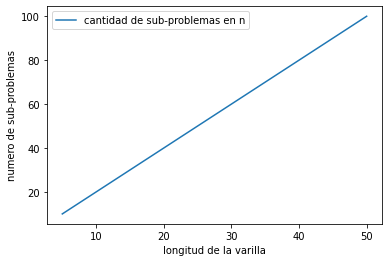

In [8]:
import matplotlib.pyplot as plt

x=[n for n in range(5,51)] 
y=[]

for n in range(5,51):
  p = cutrod_instance_generator(n)
  verbose = False

  b = cutRodBottomUp(p,n,verbose)
  y.append(cantidadSubproblemas)
  cont = 0
  cantidadSubproblemas = 0

plt.plot(x,y)
plt.legend(["cantidad de sub-problemas en n"])

plt.xlabel('longitud de la varilla')
plt.ylabel('numero de sub-problemas')
plt.show()

Como se puede ver en el gráfico anterior, se puede ver que el número de subproblemas que se generan es proporcional a la longitud de la varilla, lo que nos genera un crecimiento lineal.